In [ ]:
#|default_exp sampling_distance
## Standard libraries
import os
import math
import numpy as np
import time
from fastcore.all import *
from nbdev.showdoc import *
# Configure environment
os.environ['XLA_PYTHON_CLIENT_PREALLOCATE']='false' # Tells Jax not to hog all of the memory to this process.

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgba
import seaborn as sns
sns.set()

## Progress bar
from tqdm.auto import tqdm

## project specifics
import diffusion_curvature
import pygsp
import jax
import jax.numpy as jnp
jax.devices()

from diffusion_curvature.graphs import *
from diffusion_curvature.datasets import *
from diffusion_curvature.core import *
from diffusion_curvature.utils import *
from diffusion_curvature.comparison_space import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Sampling Distance
> For benchmarking, to measure the degree of correspondence between two samplings of a dataset.

We assume a correspondence between the points; given this, we take the two spaces, with their point-to-point correspondence, and
1. Construct a graph on each using the same kernel, with bandwidth set according to some k nearest neighbor.
2. Sum the resultant affinities ${} a(i,:)$ from one point to all others, getting the degree vector.
3. Take the EMD between the two degree vectors, using the computed manifold distances on the ground truth manifold.

We designed this for use with our neural flattener, as a means of measuring the extent to which sampling defects in the manifold space were preserved in its neurally flattened cousin.

# Implementation

In [ ]:
#|export
from diffusion_curvature.kernels import gaussian_kernel
import ot
import numpy as np
def sampling_distance(
    X1, # Poincloud 1
    X2, # Pointcloud 2
    dists # Manifold distances for most trusted pointcloud
):
    """
    Returns an EMD between the densities of two distributions.
    Assumes X1 and X2 have pointwise correspondence.
    """
    
    # A fixed kernel is best here. We estimate sigma based on the distances between neighbors, ensuring consistency between datasets.
    A1 = gaussian_kernel(X1,kernel_type="fixed",sigma=0, anisotropic_density_normalization = 0)
    D1 = A1.sum(1) # Get the degree as a density proxy
    D1 /= D1.sum() # normalize to one, as a distribution

    # repeat for X2
    A2 = gaussian_kernel(X2,kernel_type="fixed",sigma=0, anisotropic_density_normalization = 0)
    D2 = A2.sum(1) # Get the degree as a density proxy
    D2 /= D2.sum() # normalize to one, as a distribution

    return ot.emd2(D1, D2, dists)

# Tests

In [ ]:
from heatgeo.embedding import HeatGeo

In [ ]:
X1 = np.random.rand(100,2)
X2 = np.random.rand(100,2)
emb_op = HeatGeo(knn=5)
emb = emb_op.fit_transform(X1)
dists = emb_op.dist

Using s_gd2 for MDS. None


In [ ]:
# A fixed kernel is best here. We estimate sigma based on the distances between neighbors, ensuring consistency between datasets.
A1 = gaussian_kernel(X1,kernel_type="adaptive",k=5, anisotropic_density_normalization = 0)
D1 = A1.sum(1) # Get the degree as a density proxy
D1 /= D1.sum() # normalize to one, as a distribution

# repeat for X2
A2 = gaussian_kernel(X2,kernel_type="adaptive",k=5, anisotropic_density_normalization = 0)
D2 = A2.sum(1) # Get the degree as a density proxy
D2 /= D2.sum() # normalize to one, as a distribution

<matplotlib.collections.PathCollection>

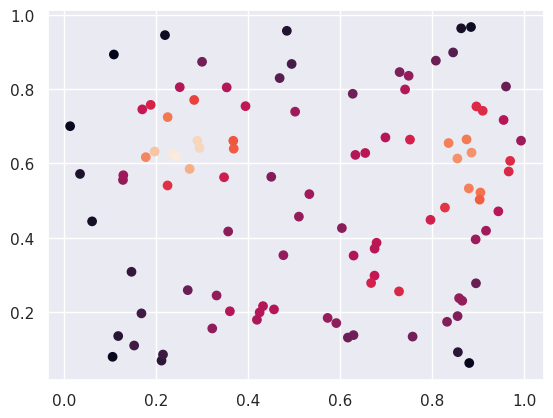

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=D1)

In [ ]:
dists

array([[10.53315667, 13.00639093, 11.86594332, ..., 15.64166678,
        10.12875338, 20.22464858],
       [13.00639093, 10.69102437, 15.04192529, ..., 18.37980471,
        13.03877756, 17.97388705],
       [11.86594332, 15.04192529, 11.16434493, ..., 13.2095532 ,
        11.27447026, 19.88930307],
       ...,
       [15.64166678, 18.37980471, 13.2095532 , ...,  9.73402495,
        14.92062753, 19.17711899],
       [10.12875338, 13.03877756, 11.27447026, ..., 14.92062753,
         9.66931856, 20.56774144],
       [20.22464858, 17.97388705, 19.88930307, ..., 19.17711899,
        20.56774144, 10.42222323]])

In [ ]:
ot.sinkhorn2(D1, D1, dists, 1)

11.169563279201462

In [ ]:
sampling_distance(X1, X2, dists)

False
1.0


10.61235412481682

In [ ]:
sampling_distance(X1, X1, dists)

True
1.0000000000000002


10.55082592905665

In [ ]:
# sync changes to the library
from IPython.display import display, Javascript
import time
display(Javascript('IPython.notebook.save_checkpoint();'))
time.sleep(2)
!pixi run nbsync

<IPython.core.display.Javascript object>

 WARN pixi::project::manifest: BETA feature `[pypi-dependencies]` enabled!

Please report any and all issues here:

	https://github.com/prefix-dev/pixi.

Turn this warning off by setting the environment variable `PIXI_BETA_WARNING_OFF` to `true`.

✨ Pixi task: nbdev_export                                           
